# EDA -- REVIEWS DE YELP

COMIENZO A ANALIZAR EL REVIEWS DE YELP

In [8]:
import ast
import json
import pandas as pd
import numpy as np
import jsonlines
import matplotlib.pyplot as plt

Cargo el dataset

In [3]:
data = []
with jsonlines.open('data/Yelp/review.json') as reader:
    for obj in reader:
        data.append(obj)

df_review = pd.DataFrame(data)
df_review 

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


Quiero ver valores faltantes y columnas

In [4]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


Aca veo los tipos de datos presentes

In [5]:
df_review.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Podemos ver que no hay ningun valor faltante ni valores nulos.

Quiero los valores unicos de Stars

In [6]:
df_review['stars'].unique()

array([3., 5., 4., 1., 2.])

# Gráficos

Analizamos algunas muestras

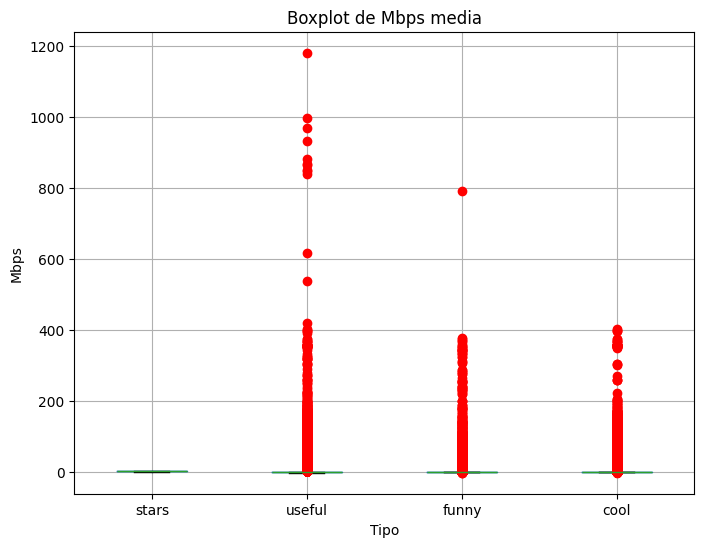

In [9]:

plt.figure(figsize=(8,6))
df_review.boxplot(column=['stars','useful','funny','cool'], sym='ro')
plt.title('Boxplot de Mbps media')
plt.xlabel('Tipo')
plt.ylabel('Mbps')

plt.show()

Existen muchas cantidad de outliers en la columna 'useful', 'funny' y 'cool' . La columna Stars esta con parametros correctos. 

Nube de palabras

In [10]:
from wordcloud import WordCloud

In [11]:
# Tomar las primeras 1000 filas de la columna 'text'
df_review_subset = df_review.head(10000)

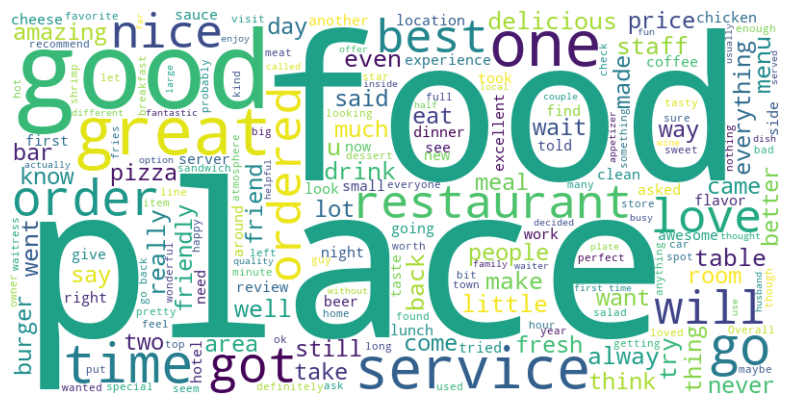

In [12]:
text = " ".join(review for review in df_review_subset.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
ruta = 'data/Yelp/review.json'

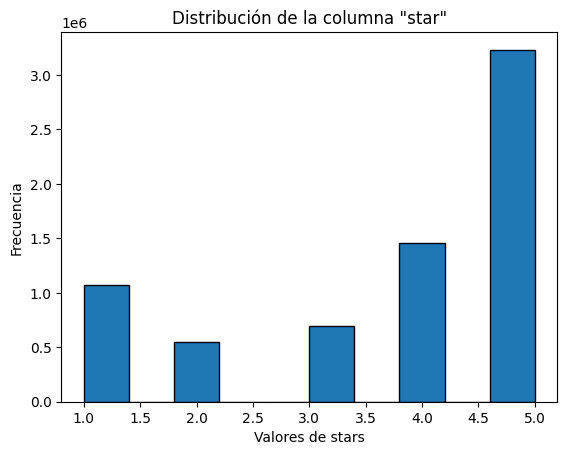

In [14]:
tam_muestra = 1000
muestra = pd.read_json(r'data/Yelp/review.json',
                      lines=True, chunksize=tam_muestra)

valores = []

for valor in muestra:
    
    valores_uso = valor['stars']
    
    valores.extend(valores_uso)


plt.hist(valores, bins=10, edgecolor='black')
plt.xlabel('Valores de stars')
plt.ylabel('Frecuencia')
plt.title('Distribución de la columna "star"')
plt.show()


Se ve una tendencia de mayor frecuencia de puntuaciones por encima de 3.5 en las reseñas.
La mayoría de las experiencias de los usuarios son positivas. Vemos que los usuarios tienden a calificar favorablemente los negocios que están revisando.



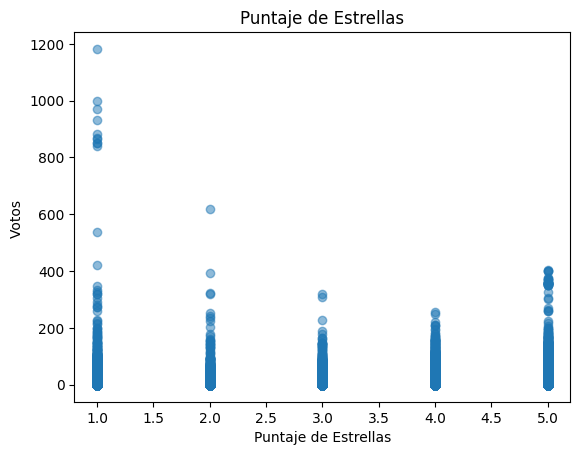

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


tam_muestra = 10000
muestra = pd.read_json(r'data/Yelp/review.json',
                      lines=True, chunksize=tam_muestra)

useful_list = []
stars_list = []


for data_block in muestra:
    useful_list.extend(data_block['useful'])
    stars_list.extend(data_block['stars'])


plt.scatter(stars_list, useful_list, alpha=0.5)
plt.xlabel('Puntaje de Estrellas')
plt.ylabel('Votos ')
plt.title('Puntaje de Estrellas')
plt.show()

En este gráfico queda en evidencia que al ver estrellas con valor bajo, hay mas interaccion de  al comentario siendo calificado como 'useful' por otros usuarios.
